<a href="https://colab.research.google.com/github/Juniorexz/Codigo/blob/master/DataScience_SeriesTemporais.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [126]:
#

#Empresa Alucar - Analisando as vendas


In [127]:
import pandas as pd

In [128]:
pd.read_csv('alucar.csv').head(5)

,mes,vendas
0,2017-01-31,10
1,2017-02-28,20
2,2017-03-31,33
3,2017-04-30,47
4,2017-05-31,63


In [129]:
alucar = pd.read_csv('alucar.csv')

In [130]:
alucar.head()

,mes,vendas
0,2017-01-31,10
1,2017-02-28,20
2,2017-03-31,33
3,2017-04-30,47
4,2017-05-31,63


In [131]:
print('Quantidade de linhas e colunas:', alucar.shape)

Quantidade de linhas e colunas: (24, 2)


In [132]:
print('Quantidade de dados nulos:', alucar.isna().sum())

Quantidade de dados nulos: mes       0
vendas    0
dtype: int64


In [133]:
#Soma total de dados nulos 
print('Quantidade de dados nulos:', alucar.isna().sum().sum())

Quantidade de dados nulos: 0


In [134]:
alucar.dtypes

mes       object
vendas     int64
dtype: object

In [135]:
alucar['mes'] = pd.to_datetime(alucar['mes'])

In [136]:

!pip install seaborn==0.11.2
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [137]:
print(sns.__version__)

0.11.2


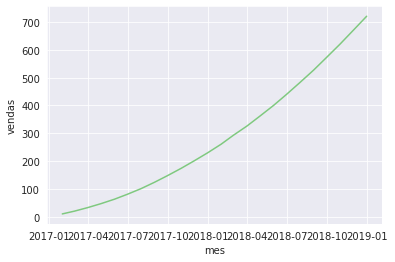

In [138]:
sns.lineplot(x='mes', y='vendas', data=alucar)

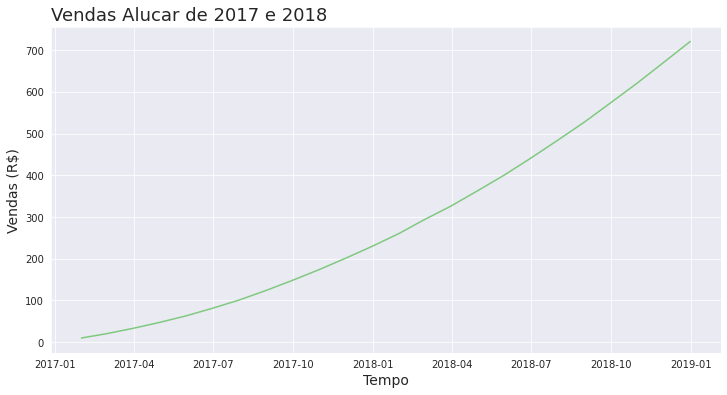

In [139]:
sns.set_palette('Accent')
sns.set_style('darkgrid')
ax = sns.lineplot(x='mes', y='vendas', data=alucar)
ax.figure.set_size_inches(12,6)
ax.set_title('Vendas Alucar de 2017 e 2018', loc='left', fontsize=18)
ax.set_xlabel('Tempo', fontsize=14)
ax.set_ylabel('Vendas (R$)', fontsize=14)
ax = ax

In [140]:
alucar.head()

,mes,vendas
0,2017-01-31,10
1,2017-02-28,20
2,2017-03-31,33
3,2017-04-30,47
4,2017-05-31,63


In [141]:
alucar['aumento'] = alucar['vendas'].diff()
alucar.head()
#Diferenças de aumento nas vendas

,mes,vendas,aumento
0,2017-01-31,10,NaN
1,2017-02-28,20,10.0
2,2017-03-31,33,13.0
3,2017-04-30,47,14.0
4,2017-05-31,63,16.0


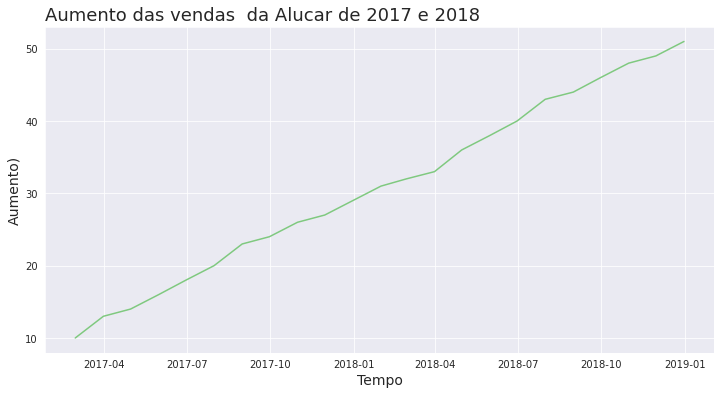

In [142]:
sns.set_palette('Accent')
sns.set_style('darkgrid')
ax = sns.lineplot(x='mes', y='aumento', data=alucar)
ax.figure.set_size_inches(12,6)
ax.set_title('Aumento das vendas  da Alucar de 2017 e 2018', loc='left', fontsize=18)
ax.set_xlabel('Tempo', fontsize=14)
ax.set_ylabel('Aumento)', fontsize=14)
ax = ax

In [143]:
def plotar(titulo, labelx, labely, x, y, dataset):
  sns.set_palette('Accent')
  sns.set_style('darkgrid')
  ax = sns.lineplot(x=x, y=y, data=dataset)
  ax.figure.set_size_inches(12,6)
  ax.set_title(titulo, loc='left', fontsize=18)
  ax.set_xlabel(labelx, fontsize=14)
  ax.set_ylabel(labely, fontsize=14)
  ax = ax

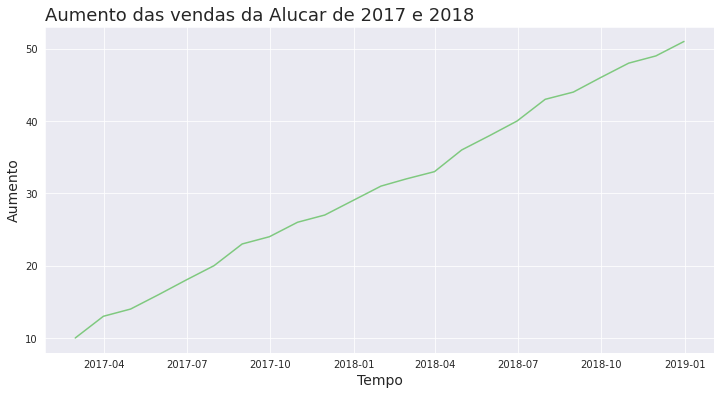

In [144]:
plotar('Aumento das vendas da Alucar de 2017 e 2018', 'Tempo', 'Aumento',
       'mes', 'aumento', alucar)                  

In [145]:
alucar['aceleracao'] = alucar['aumento'].diff()
alucar.head()

,mes,vendas,aumento,aceleracao
0,2017-01-31,10,NaN,NaN
1,2017-02-28,20,10.0,NaN
2,2017-03-31,33,13.0,3.0
3,2017-04-30,47,14.0,1.0
4,2017-05-31,63,16.0,2.0


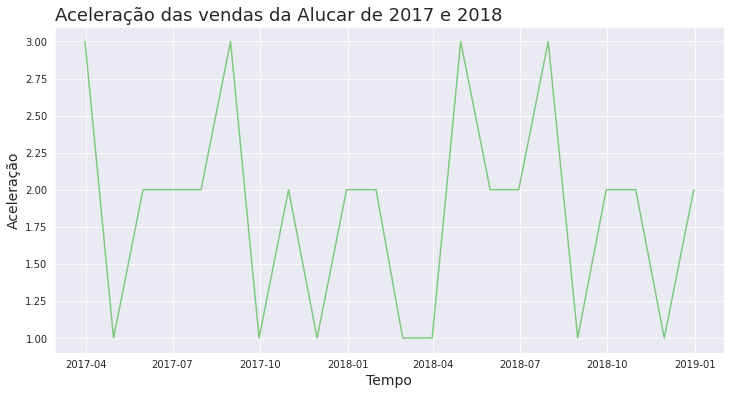

In [146]:
plotar('Aceleração das vendas da Alucar de 2017 e 2018', 'Tempo', 'Aceleração', 
       'mes', 'aceleracao', alucar)

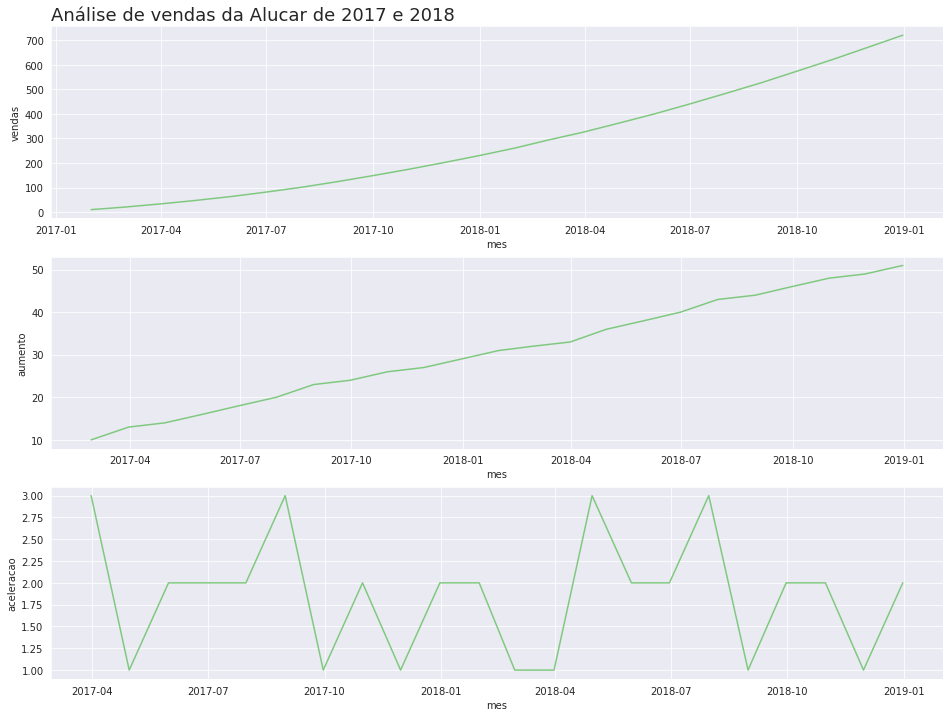

In [147]:
plt.figure(figsize=(16,12))
ax = plt.subplot(3,1,1)
ax.set_title('Análise de vendas da Alucar de 2017 e 2018', fontsize=18,loc='left')
sns.lineplot(x='mes', y='vendas', data=alucar)
plt.subplot(3,1,2)
sns.lineplot(x='mes', y='aumento', data=alucar)
plt.subplot(3,1,3)
sns.lineplot(x='mes', y='aceleracao', data=alucar)
ax = ax

In [148]:
def plot_comparacao(x, y1, y2, y3, dataset, titulo):
  plt.figure(figsize=(16,12))
  ax = plt.subplot(3,1,1)
  ax.set_title(titulo, fontsize=18,loc='left')
  sns.lineplot(x=x, y=y1, data=dataset)
  plt.subplot(3,1,2)
  sns.lineplot(x=x, y=y2, data=dataset)
  plt.subplot(3,1,3)
  sns.lineplot(x=x, y=y3, data=dataset)
  ax = ax
  

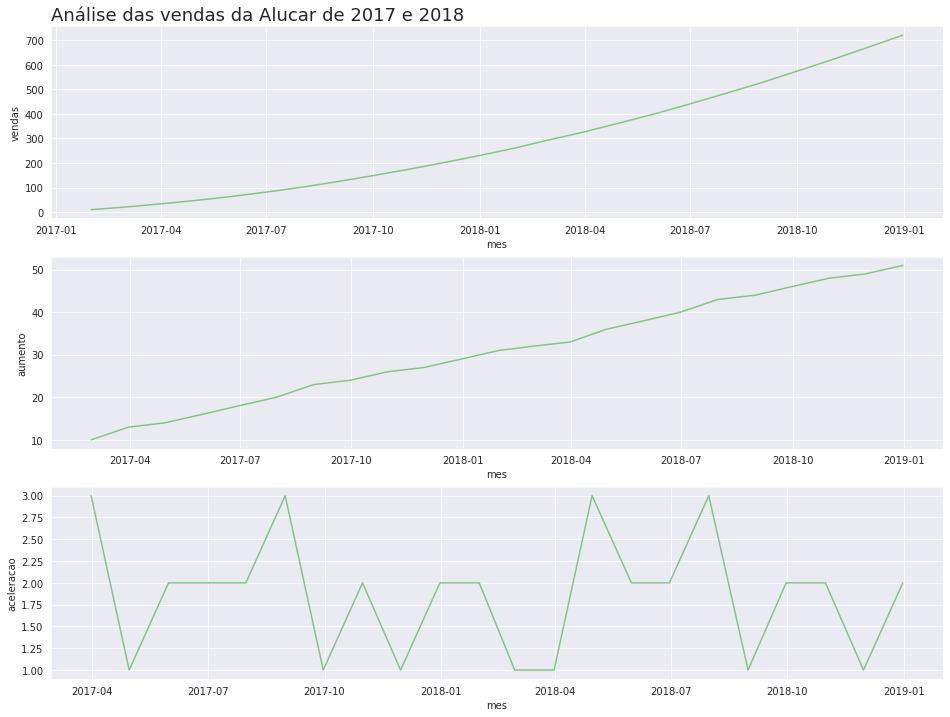

In [149]:
plot_comparacao('mes', 'vendas', 'aumento', 'aceleracao',
                alucar, 'Análise das vendas da Alucar de 2017 e 2018')

In [150]:
from pandas.plotting import autocorrelation_plot

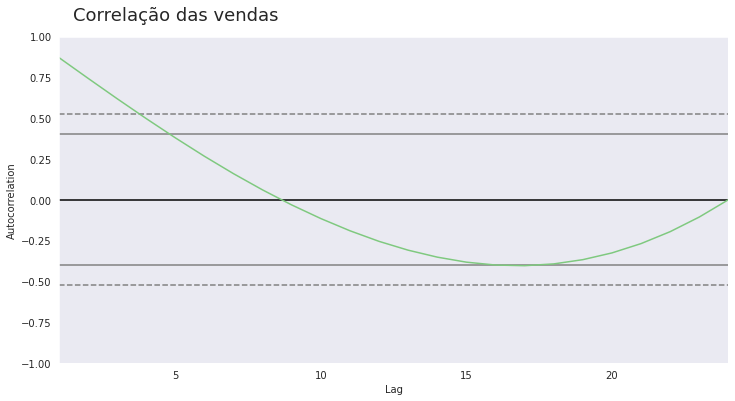

In [151]:
ax = plt.figure(figsize=(12,6))
ax.suptitle('Correlação das vendas', fontsize=18, x=0.26, y=0.95)
autocorrelation_plot(alucar['vendas'])
ax = ax

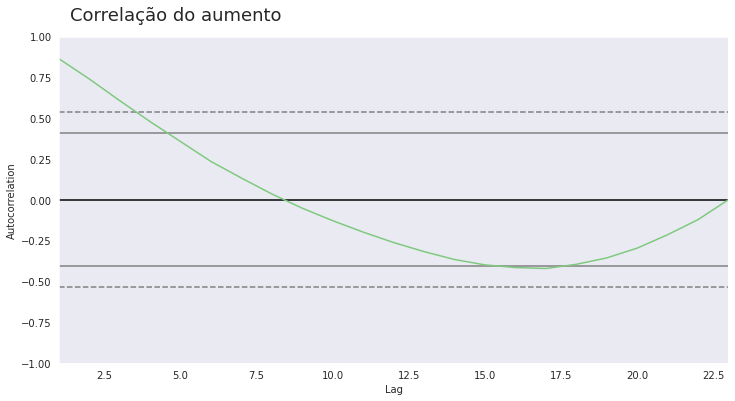

In [152]:
ax = plt.figure(figsize=(12,6))
ax.suptitle('Correlação do aumento', fontsize=18, x=0.26, y=0.95)
autocorrelation_plot(alucar['aumento'][1:])
ax = ax

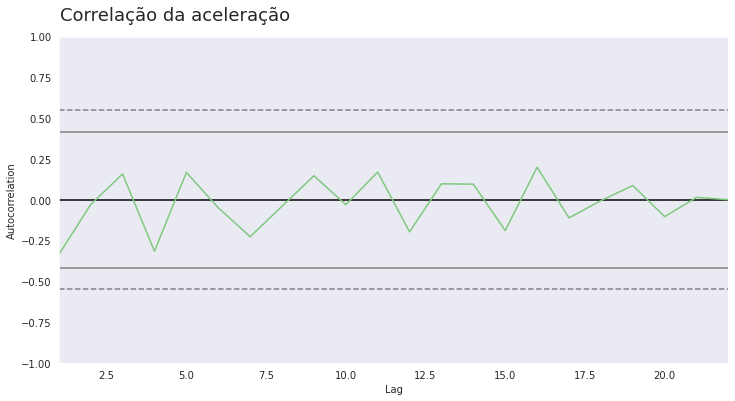

In [153]:
ax = plt.figure(figsize=(12,6))
ax.suptitle('Correlação da aceleração', fontsize=18, x=0.26, y=0.95)
autocorrelation_plot(alucar['aceleracao'][2:])
ax = ax

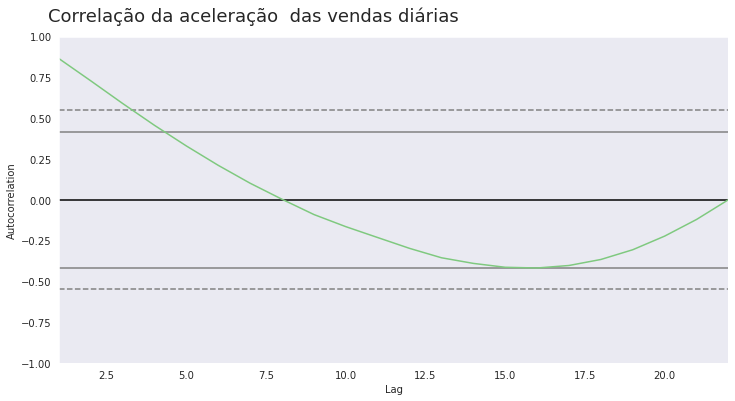

In [154]:
ax = plt.figure(figsize=(12,6))
ax.suptitle('Correlação da aceleração  das vendas diárias', fontsize=18, x=0.35, y=0.95)
autocorrelation_plot(alucar['aumento'][2:])
ax = ax 

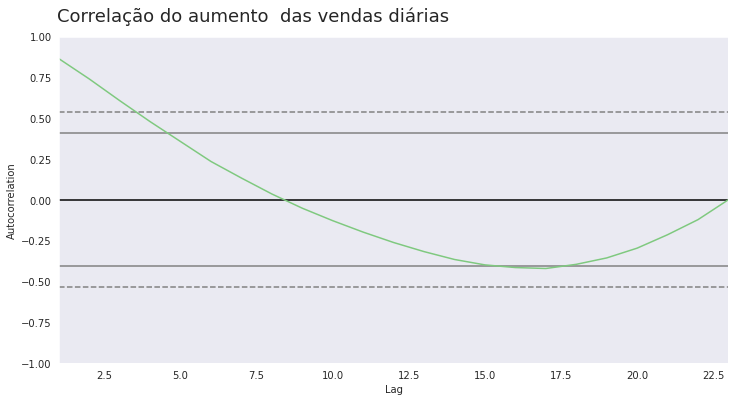

In [155]:
ax = plt.figure(figsize=(12,6))
ax.suptitle('Correlação do aumento  das vendas diárias', fontsize=18, x=0.35, y=0.95)
autocorrelation_plot(alucar['aumento'][1:])
ax = ax 

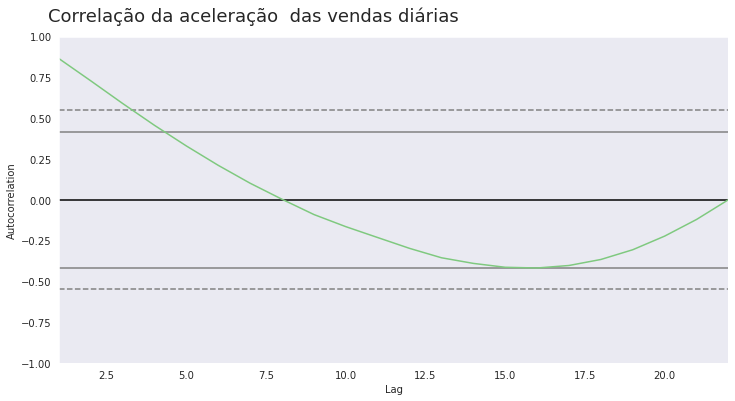

In [156]:
ax = plt.figure(figsize=(12,6))
ax.suptitle('Correlação da aceleração  das vendas diárias', fontsize=18, x=0.35, y=0.95)
autocorrelation_plot(alucar['aumento'][2:])
ax = ax 



```
# Isto está formatado como código
```

# Alucar - Analisando assinantes da newsletter

In [157]:
assinantes = pd.read_csv('newsletter_alucar.csv')
assinantes.head()

,mes,assinantes
0,2017-01-31,0
1,2017-02-28,10
2,2017-03-31,21
3,2017-04-30,34
4,2017-05-31,49


In [158]:
assinantes.dtypes

mes           object
assinantes     int64
dtype: object

In [159]:
print('Quantidade de linhas e colunas:', assinantes.shape)
print('Quantidade de dados nulos:', assinantes.isna().sum().sum())

Quantidade de linhas e colunas: (24, 2)
Quantidade de dados nulos: 0


In [160]:
assinantes['mes'] = pd.to_datetime(assinantes['mes'])
assinantes.dtypes

mes           datetime64[ns]
assinantes             int64
dtype: object

In [161]:
assinantes['aumento'] = assinantes['assinantes'].diff()
assinantes['aceleracao'] = assinantes['aumento'].diff()
assinantes.head()


,mes,assinantes,aumento,aceleracao
0,2017-01-31,0,NaN,NaN
1,2017-02-28,10,10.0,NaN
2,2017-03-31,21,11.0,1.0
3,2017-04-30,34,13.0,2.0
4,2017-05-31,49,15.0,2.0


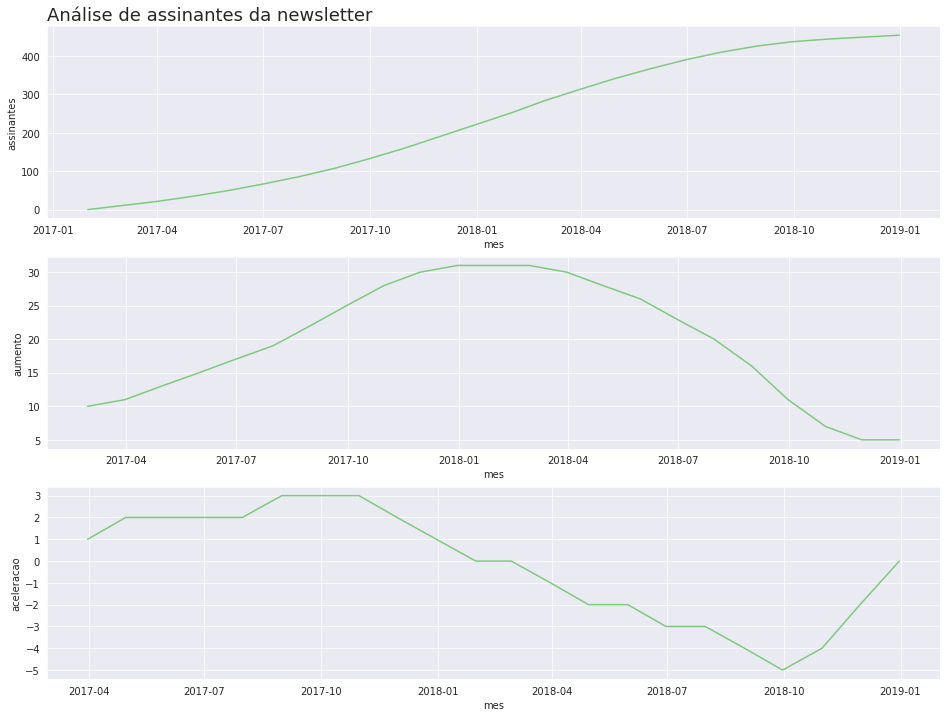

In [162]:
plot_comparacao('mes', 'assinantes', 'aumento', 'aceleracao', assinantes, 'Análise de assinantes da newsletter')

Chocolura - Analisando as vendas

In [163]:
chocolura = pd.read_csv('chocolura.csv')
chocolura.head()

,mes,vendas
0,2017-01,210
1,2017-02,185
2,2017-03,209
3,2017-04,280
4,2017-05,211


In [164]:
chocolura.dtypes

mes       object
vendas     int64
dtype: object

In [165]:
chocolura['mes'] = pd.to_datetime(chocolura['mes'])
chocolura.dtypes

mes       datetime64[ns]
vendas             int64
dtype: object

In [166]:
print('Quantidade de linhas:', chocolura.shape)
print('Quantidade de dados nulos:', chocolura.isna().sum().sum())

Quantidade de linhas: (24, 2)
Quantidade de dados nulos: 0


In [167]:
chocolura['aumento'] = chocolura['vendas'].diff()
chocolura['aceleracao'] = chocolura ['aumento'].diff()
chocolura.head()

,mes,vendas,aumento,aceleracao
0,2017-01-01,210,NaN,NaN
1,2017-02-01,185,-25.0,NaN
2,2017-03-01,209,24.0,49.0
3,2017-04-01,280,71.0,47.0
4,2017-05-01,211,-69.0,-140.0


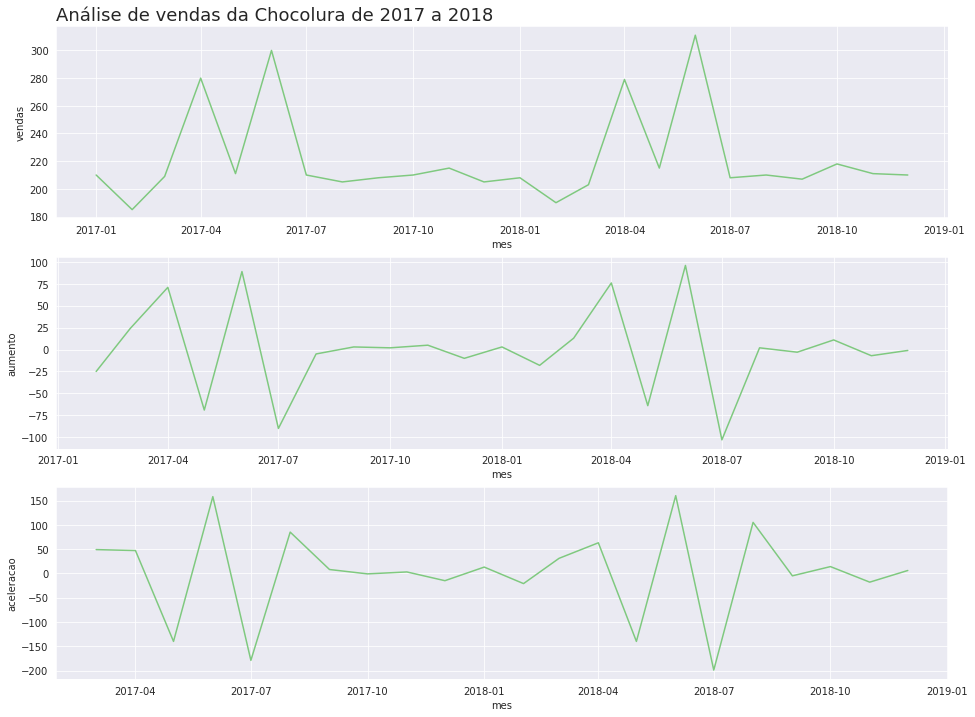

In [168]:
plot_comparacao('mes', 'vendas', 'aumento', 'aceleracao', 
                chocolura, 'Análise de vendas da Chocolura de 2017 a 2018')

Chocolura - Vendas diárias(Outubro e Novembro)

In [169]:
#Sazonalidade - Padrão no gráfico em determinado tempo que pode representar aumento ou queda

In [170]:
vendas_por_dia = pd.read_csv('vendas_por_dia.csv')
vendas_por_dia.head()

,dia,vendas
0,2018-10-01,50
1,2018-10-02,48
2,2018-10-03,56
3,2018-10-04,50
4,2018-10-05,51


In [171]:
print('Quantidade de linhas e colunas:', vendas_por_dia.shape)
print('Quantidade de dados nulos:', vendas_por_dia.isna().sum().sum())

Quantidade de linhas e colunas: (61, 2)
Quantidade de dados nulos: 0


In [172]:
vendas_por_dia.dtypes

dia       object
vendas     int64
dtype: object

In [173]:
vendas_por_dia['dia'] = pd.to_datetime(vendas_por_dia['dia'])
vendas_por_dia.dtypes

dia       datetime64[ns]
vendas             int64
dtype: object

In [174]:
vendas_por_dia['aumento'] = vendas_por_dia['vendas'].diff()
vendas_por_dia['aceleracao'] = vendas_por_dia['aumento'].diff()
vendas_por_dia.head()

,dia,vendas,aumento,aceleracao
0,2018-10-01,50,NaN,NaN
1,2018-10-02,48,-2.0,NaN
2,2018-10-03,56,8.0,10.0
3,2018-10-04,50,-6.0,-14.0
4,2018-10-05,51,1.0,7.0


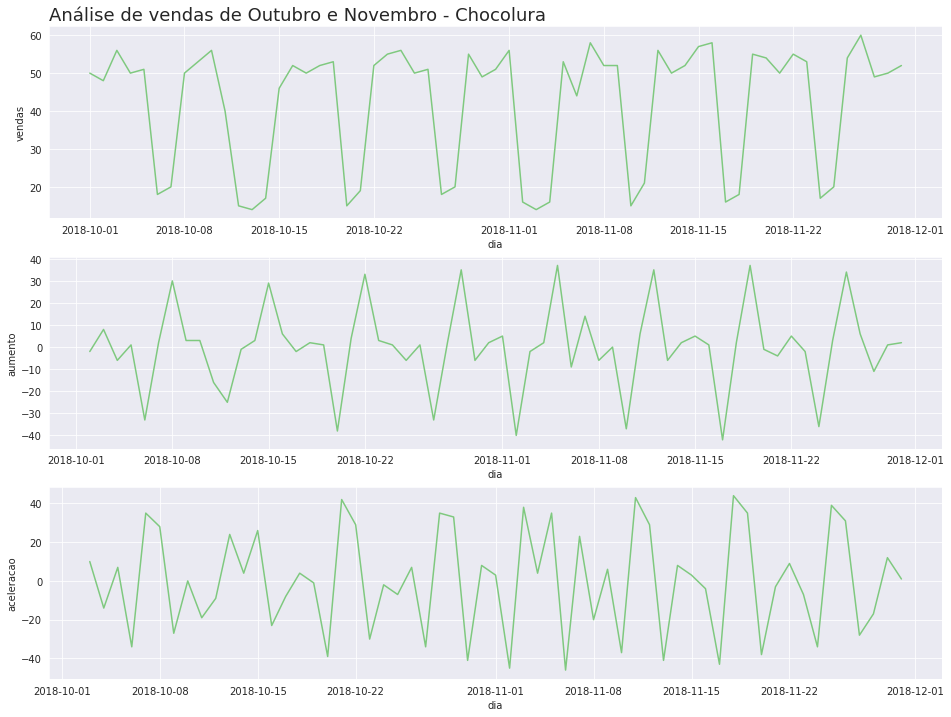

In [175]:
plot_comparacao('dia', 'vendas', 'aumento', 'aceleracao',
                vendas_por_dia, 'Análise de vendas de Outubro e Novembro - Chocolura')

In [176]:
#coisas que acontecem sempre em uma determinada época = sazonalidade

Analisando a sazonalidade

In [177]:
vendas_por_dia['dia_da_semana'] = vendas_por_dia['dia'].dt.weekday


In [178]:
vendas_por_dia.head(7)

,dia,vendas,aumento,aceleracao,dia_da_semana
0,2018-10-01,50,NaN,NaN,0
1,2018-10-02,48,-2.0,NaN,1
2,2018-10-03,56,8.0,10.0,2
3,2018-10-04,50,-6.0,-14.0,3
4,2018-10-05,51,1.0,7.0,4
5,2018-10-06,18,-33.0,-34.0,5
6,2018-10-07,20,2.0,35.0,6


In [179]:
vendas_por_dia['dia_da_semana'].unique()

array([0, 1, 2, 3, 4, 5, 6])

In [180]:
vendas_por_dia.dia=pd.to_datetime(vendas_por_dia.dia)

In [181]:
vendas_por_dia.set_index('dia',drop=True,inplace = True)

In [182]:
vendas_por_dia.head(7)

,vendas,aumento,aceleracao,dia_da_semana
dia,,,,
2018-10-01,50,NaN,NaN,0
2018-10-02,48,-2.0,NaN,1
2018-10-03,56,8.0,10.0,2
2018-10-04,50,-6.0,-14.0,3
2018-10-05,51,1.0,7.0,4
2018-10-06,18,-33.0,-34.0,5
2018-10-07,20,2.0,35.0,6


In [183]:
vendas_por_dia['dia_mes'] = vendas_por_dia.index.weekday


In [184]:
vendas_por_dia.head(7)

,vendas,aumento,aceleracao,dia_da_semana,dia_mes
dia,,,,,
2018-10-01,50,NaN,NaN,0,0
2018-10-02,48,-2.0,NaN,1,1
2018-10-03,56,8.0,10.0,2,2
2018-10-04,50,-6.0,-14.0,3,3
2018-10-05,51,1.0,7.0,4,4
2018-10-06,18,-33.0,-34.0,5,5
2018-10-07,20,2.0,35.0,6,6


In [185]:
dia_da_semana = {"0":"Domingo", "1":"Segunda", "2":"Terça", "3":"Quarta", "4":"Quinta", "5":"Sexta", "6":"Sabádo"}
dia_da_semana


{'0': 'Domingo',
 '1': 'Segunda',
 '2': 'Terça',
 '3': 'Quarta',
 '4': 'Quinta',
 '5': 'Sexta',
 '6': 'Sabádo'}

In [186]:
vendas_por_dia.head(7)

,vendas,aumento,aceleracao,dia_da_semana,dia_mes
dia,,,,,
2018-10-01,50,NaN,NaN,0,0
2018-10-02,48,-2.0,NaN,1,1
2018-10-03,56,8.0,10.0,2,2
2018-10-04,50,-6.0,-14.0,3,3
2018-10-05,51,1.0,7.0,4,4
2018-10-06,18,-33.0,-34.0,5,5
2018-10-07,20,2.0,35.0,6,6


In [187]:
vendas_por_dia['nome_semana'] = vendas_por_dia['dia_mes'].map({0: 'segunda', 1: 'terca', 2: 'quarta', 3: 'quinta', 4: 'sexta', 5: 'sabado' , 6: 'domingo'})

In [188]:
vendas_por_dia.head(7)

,vendas,aumento,aceleracao,dia_da_semana,dia_mes,nome_semana
dia,,,,,,
2018-10-01,50,NaN,NaN,0,0,segunda
2018-10-02,48,-2.0,NaN,1,1,terca
2018-10-03,56,8.0,10.0,2,2,quarta
2018-10-04,50,-6.0,-14.0,3,3,quinta
2018-10-05,51,1.0,7.0,4,4,sexta
2018-10-06,18,-33.0,-34.0,5,5,sabado
2018-10-07,20,2.0,35.0,6,6,domingo


Agrupando os dias


In [189]:
vendas_agrupadas = vendas_por_dia.groupby('nome_semana')['vendas', 'aumento','aceleracao'].mean().round()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


In [190]:
vendas_agrupadas

,vendas,aumento,aceleracao
nome_semana,,,
domingo,19.0,3.0,31.0
quarta,53.0,1.0,2.0
quinta,51.0,-2.0,-3.0
sabado,16.0,-28.0,-20.0
segunda,52.0,34.0,31.0
sexta,45.0,-7.0,-5.0
terca,52.0,-1.0,-34.0


In [191]:
estrutura_troca_dia = {0: 'segunda', 1: 'terca', 2: 'quarta', 3: 'quinta', 4: 'sexta', 5: 'sabado' , 6: 'domingo'}

In [192]:
vendas_agrupadas = list(vendas_por_dia['dia_da_semana'])

In [193]:
#novaListaDias = [estrutura_troca_dia[dia] for dia in estrutura_troca_dia]   #Usa uma listcomp pra operar sob cada elemento da lista

In [194]:
vendas_por_dia.head(14)

,vendas,aumento,aceleracao,dia_da_semana,dia_mes,nome_semana
dia,,,,,,
2018-10-01,50,NaN,NaN,0,0,segunda
2018-10-02,48,-2.0,NaN,1,1,terca
2018-10-03,56,8.0,10.0,2,2,quarta
2018-10-04,50,-6.0,-14.0,3,3,quinta
2018-10-05,51,1.0,7.0,4,4,sexta
2018-10-06,18,-33.0,-34.0,5,5,sabado
2018-10-07,20,2.0,35.0,6,6,domingo
2018-10-08,50,30.0,28.0,0,0,segunda
2018-10-09,53,3.0,-27.0,1,1,terca


Correlação das vendas diárias


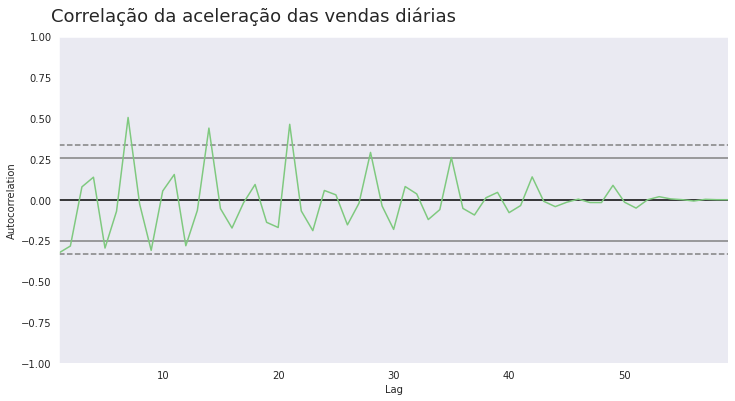

In [195]:
ax = plt.figure(figsize=(12,6))
ax.suptitle('Correlação da aceleração das vendas diárias', fontsize=18, x=0.35, y=0.95)
autocorrelation_plot(vendas_por_dia['aceleracao'][2:])
ax = ax 

Cafelura - Análise de vendas


In [196]:
cafelura = pd.read_csv('cafelura.csv')
cafelura.head()

,mes,vendas
0,2017-01-31,880
1,2017-02-28,1600
2,2017-03-31,3240
3,2017-04-30,3840
4,2017-05-31,5670


In [197]:
cafelura.dtypes

mes       object
vendas     int64
dtype: object

In [198]:
cafelura['mes'] = pd.to_datetime(cafelura['mes'])
cafelura.dtypes

mes       datetime64[ns]
vendas             int64
dtype: object

In [199]:
print('Quantidade de linhas e colunas:', cafelura.shape)
print('Quantidade de dados nulos:', cafelura.isna().sum().sum())


Quantidade de linhas e colunas: (24, 2)
Quantidade de dados nulos: 0


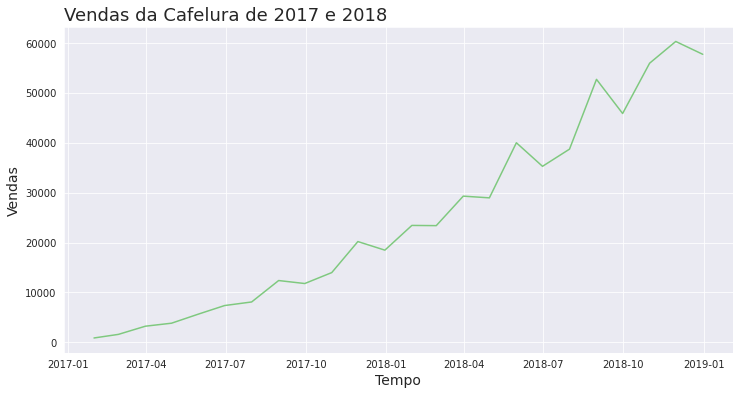

In [200]:
plotar('Vendas da Cafelura de 2017 e 2018', 'Tempo', 'Vendas',
       'mes', 'vendas', cafelura)

In [201]:
quantidade_de_dias_de_fds = pd.read_csv('dias_final_de_semana.csv')
quantidade_de_dias_de_fds.head()

,quantidade_de_dias
0,8
1,8
2,10
3,8
4,9


In [202]:
quantidade_de_dias_de_fds['quantidade_de_dias'].values

array([ 8,  8, 10,  8,  9,  9,  8, 10,  8,  8, 10,  8,  9,  8,  9,  8, 10,
        8,  8, 10,  8,  9,  9,  8])

In [203]:
cafelura['vendas_normalizadas'] = cafelura['vendas'] / quantidade_de_dias_de_fds['quantidade_de_dias'].values
cafelura.head()

,mes,vendas,vendas_normalizadas
0,2017-01-31,880,110.0
1,2017-02-28,1600,200.0
2,2017-03-31,3240,324.0
3,2017-04-30,3840,480.0
4,2017-05-31,5670,630.0


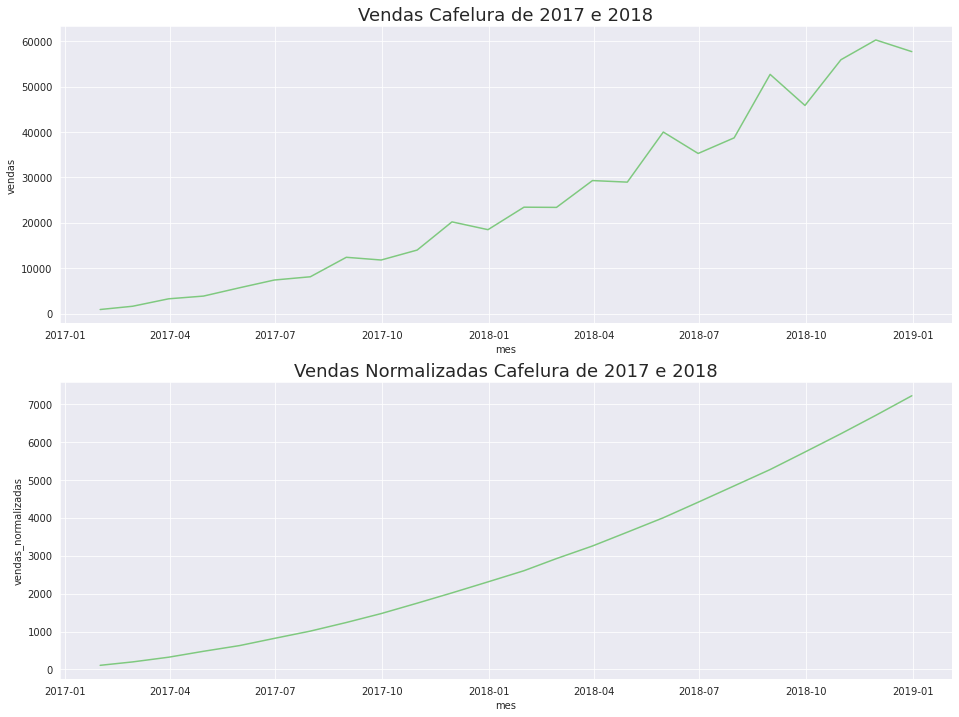

In [204]:
plt.figure(figsize=(16,12))
ax = plt.subplot(2,1,1)
ax.set_title('Vendas Cafelura de 2017 e 2018', fontsize=18)
sns.lineplot(x='mes', y='vendas', data=cafelura)
ax = plt.subplot(2,1,2)
ax.set_title('Vendas Normalizadas Cafelura de 2017 e 2018', fontsize=18)
sns.lineplot(x='mes', y='vendas_normalizadas', data=cafelura)
ax = ax



#Statemodels

In [205]:
!pip install statsmodels


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [206]:
import statsmodels
statsmodels.__version__

'0.12.2'

In [207]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Nova seção

In [208]:
import statsmodels
statsmodels.__version__

'0.12.2'

In [209]:
!pip install -upgrade


Usage:   
  pip3 install [options] <requirement specifier> [package-index-options] ...
  pip3 install [options] -r <requirements file> [package-index-options] ...
  pip3 install [options] [-e] <vcs project url> ...
  pip3 install [options] [-e] <local project path> ...
  pip3 install [options] <archive url/path> ...

no such option: -u


In [210]:
import sys
import os
def restart_program():
    python = sys.executable
    os.execl(python, python, * sys.argv)

In [211]:
from statsmodels import*

In [212]:
!pip install statsmodels


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [213]:
import statsmodels
statsmodels.__version__

'0.12.2'

In [214]:
from statsmodels.tsa.seasonal import seasonal_decompose

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  """Entry point for launching an IPython kernel.


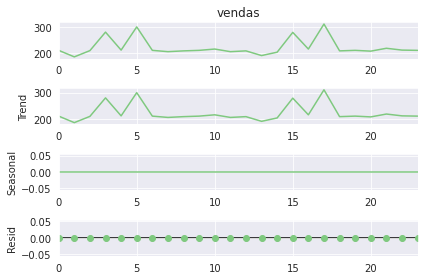

In [215]:
resultado = seasonal_decompose(chocolura['vendas'], freq=1)
ax = resultado.plot()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  """Entry point for launching an IPython kernel.


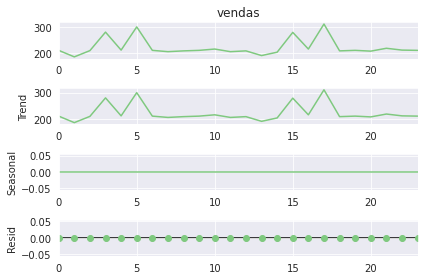

In [216]:
resultado = seasonal_decompose(chocolura['vendas'], freq=1)
ax = resultado.plot()

In [217]:
from statsmodels.datasets import co2
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
data = co2.load(True).data
data = data.resample('M').mean().ffill()

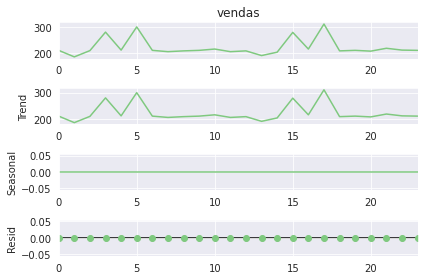

In [218]:
resultado = seasonal_decompose(chocolura['vendas'], period=1)
ax = resultado.plot()
#A nova versão

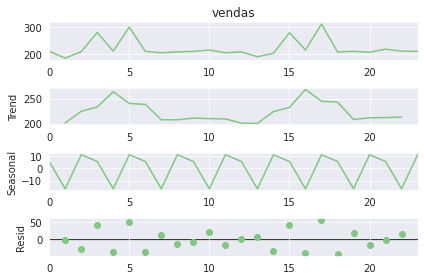

In [219]:
resultado = seasonal_decompose(chocolura['vendas'], period=3)
ax = resultado.plot()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  """Entry point for launching an IPython kernel.


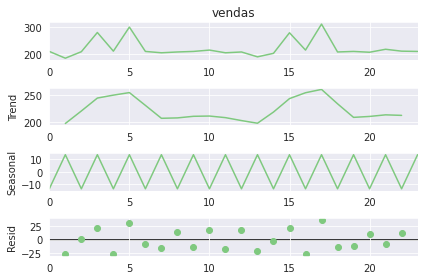

In [220]:
resultado = seasonal_decompose(chocolura['vendas'], freq=2, )
ax = resultado.plot()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  """Entry point for launching an IPython kernel.


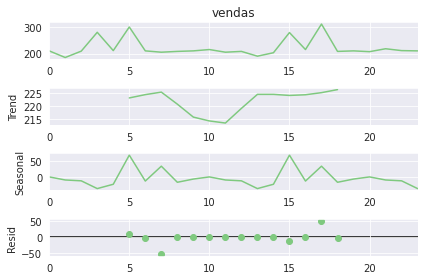

In [221]:
resultado = seasonal_decompose(chocolura['vendas'], freq=10)
ax = resultado.plot()

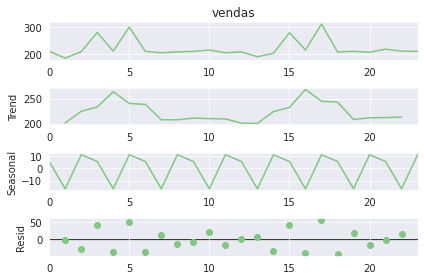

In [222]:
resultado = seasonal_decompose(chocolura['vendas'], period=3)
ax = resultado.plot()

In [223]:
observacao = resultado.observed
tendencia = resultado.trend
sazonalidade = resultado.seasonal
ruido = resultado.resid

In [224]:
data =({
    'observacao':observacao,
    'tendencia':tendencia,
    'sazonalidade':sazonalidade,
    'ruido':ruido
})

resultado = pd.DataFrame(data)
resultado.head()

,observacao,tendencia,sazonalidade,ruido
0,210.0,NaN,5.603175,NaN
1,185.0,201.333333,-16.730159,0.396825
2,209.0,224.666667,11.126984,-26.793651
3,280.0,233.333333,5.603175,41.063492
4,211.0,263.666667,-16.730159,-35.936508


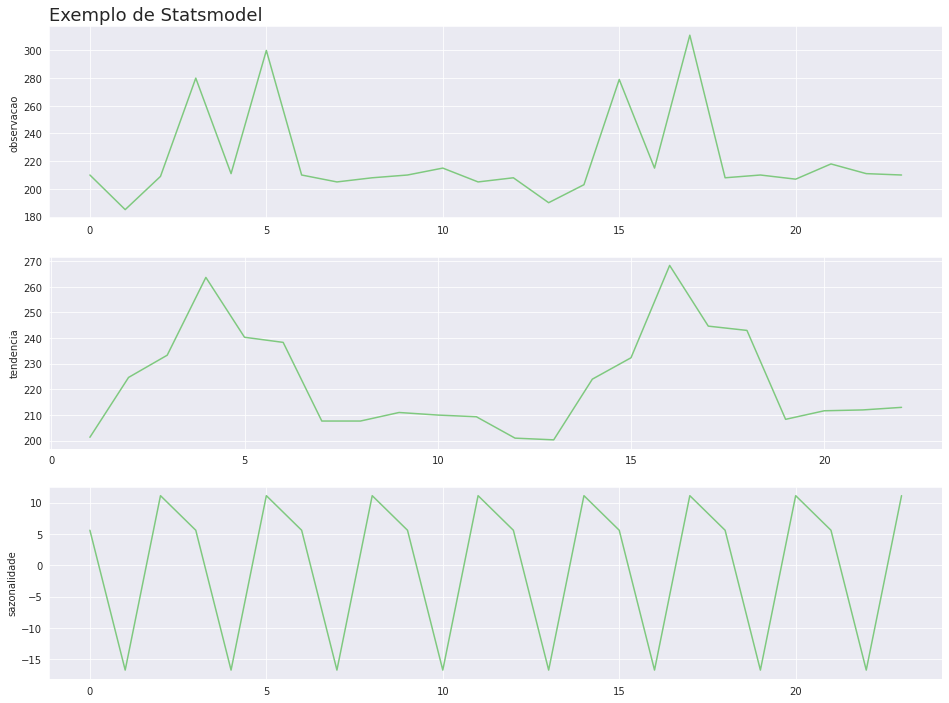

In [225]:
plot_comparacao(resultado.index, 'observacao', 'tendencia', 'sazonalidade',resultado,
                'Exemplo de Statsmodel')

Alucel - Análise de vendas



In [226]:
alucel = pd.read_csv('alucel.csv')
alucel.head()

,dia,vendas
0,2018-10-01,1374.83
1,2018-10-02,2185.69
2,2018-10-03,1860.36
3,2018-10-04,1939.02
4,2018-10-05,1946.17


In [227]:
alucel.dtypes

dia        object
vendas    float64
dtype: object

In [228]:
alucel['dia'] = pd.to_datetime(alucel['dia'])
alucel.dtypes

dia       datetime64[ns]
vendas           float64
dtype: object

In [229]:
print('Quantidade de linhas e colunas:', alucel.shape)
print('Quantidade de dados nulos:', alucel.isna().sum().sum())

Quantidade de linhas e colunas: (61, 2)
Quantidade de dados nulos: 0


In [230]:
alucel['aumento'] = alucel['vendas'].diff()
alucel['aceleracao'] = alucel['aumento'].diff()
alucel.head()

,dia,vendas,aumento,aceleracao
0,2018-10-01,1374.83,NaN,NaN
1,2018-10-02,2185.69,810.86,NaN
2,2018-10-03,1860.36,-325.33,-1136.19
3,2018-10-04,1939.02,78.66,403.99
4,2018-10-05,1946.17,7.15,-71.51


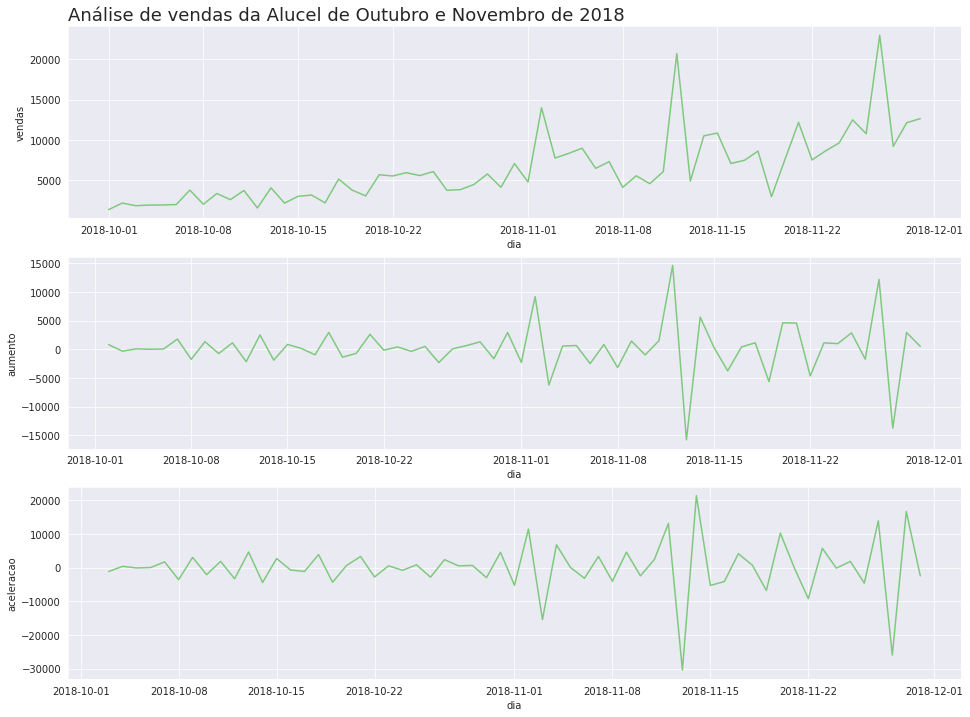

In [231]:
plot_comparacao('dia', 'vendas', 'aumento', 'aceleracao',
                alucel, 'Análise de vendas da Alucel de Outubro e Novembro de 2018')

# Média Móvel


In [232]:
alucel['media_movel'] = alucel['vendas'].rolling(7).mean()

In [233]:
alucel.head(7)

,dia,vendas,aumento,aceleracao,media_movel
0,2018-10-01,1374.83,NaN,NaN,NaN
1,2018-10-02,2185.69,810.86,NaN,NaN
2,2018-10-03,1860.36,-325.33,-1136.19,NaN
3,2018-10-04,1939.02,78.66,403.99,NaN
4,2018-10-05,1946.17,7.15,-71.51,NaN
5,2018-10-06,2005.89,59.72,52.57,NaN
6,2018-10-07,3793.07,1787.18,1727.46,2157.861429


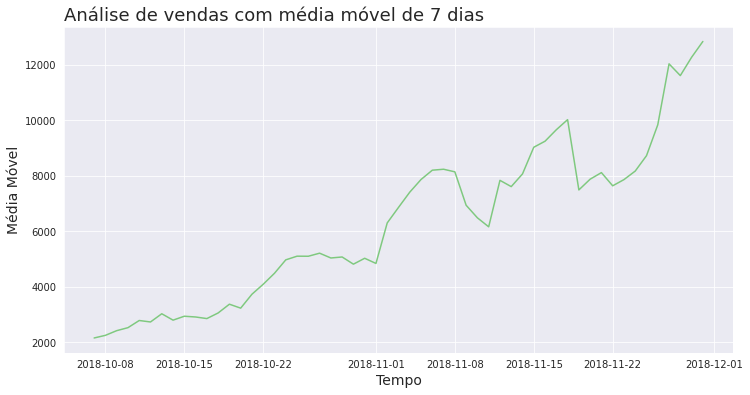

In [234]:
plotar('Análise de vendas com média móvel de 7 dias', 'Tempo', 'Média Móvel', 'dia', 'media_movel', alucel)

In [235]:
alucel['media_movel'] = alucel['vendas'].rolling(21).mean()

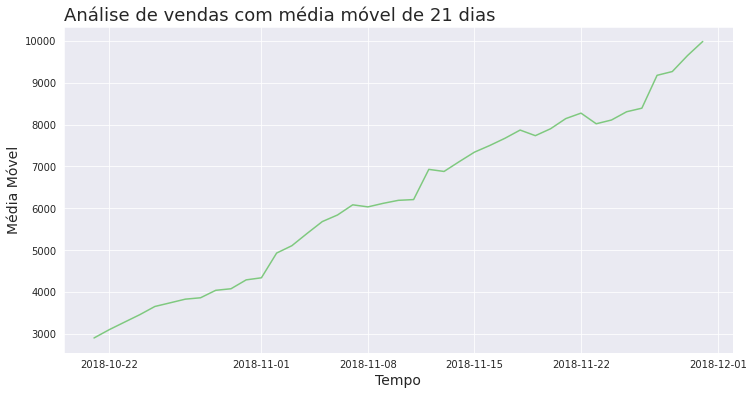

In [238]:
plotar('Análise de vendas com média móvel de 21 dias', 'Tempo', 'Média Móvel', 'dia', 'media_movel', alucel)

In [ ]:
plot_comparacao('dia', 'vendas', 'media_movel', 'media_movel_21'
                alucel', 'Comparando as vendas com médias móveis')

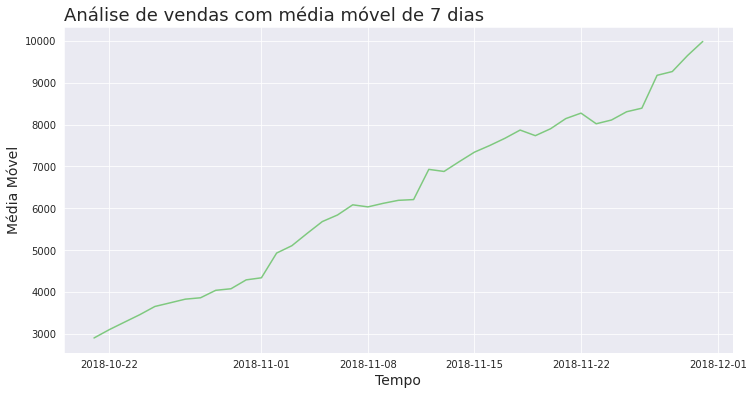

In [125]:
plotar('Análise de vendas com média móvel de 7 dias', 'Tempo', 'Média Móvel', 'dia', 'media_movel', alucel)